In [1]:
%matplotlib inline
import kagglegym
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd

# The "environment" is our interface for code competitions
env = kagglegym.make()

# We get our initial observation by calling "reset"
observation = env.reset()

# Get the train dataframe
train = observation.train
# train = train.drop(['id','y', 'timestamp','derived_1','derived_3',\
# 'fundamental_6','fundamental_10','fundamental_12','fundamental_17',\
# 'fundamental_18','fundamental_19','fundamental_20','fundamental_23','fundamental_26',\
# 'fundamental_29','fundamental_32','fundamental_33','fundamental_34','fundamental_35',\
# 'fundamental_36','fundamental_41','fundamental_42','fundamental_43','fundamental_44',\
# 'fundamental_49','fundamental_61','fundamental_62',\
# 'technical_0','technical_2','technical_6','technical_9','technical_10','technical_11',\
# 'technical_12','technical_13','technical_14','technical_16','technical_17','technical_18',\
# 'technical_22','technical_29','technical_32','technical_33','technical_34','technical_37',\
# 'technical_38','technical_39','technical_42','technical_43'], axis=1)

train = train[['technical_30', 'technical_20', 'fundamental_11']]
mean_values = train.median(axis=0)
#train.fillna(mean_values, inplace = True)
#train = np.clip(train,-2.0,2.0)
#standev = train.std(axis=0)
#train = (train-mean_values)/(standev)


low_y_cut = -0.075
high_y_cut = 0.075
y = observation.train.y
y_is_above_cut = (y > high_y_cut)
y_is_below_cut = (y < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

n = train.isnull().sum(axis=1)
for c in train.columns:
    train[c + '_nan_'] = pd.isnull(train[c])
    mean_values[c + '_nan_'] = 0
train = train.fillna(mean_values)
train['znull'] = n


train = train.loc[y_is_within_cut, :]
y = y.loc[y_is_within_cut]


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

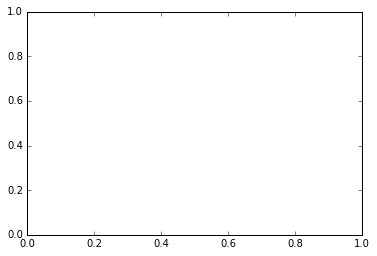

In [2]:
spect = np.fft.fft(train)
freq = np.fft.fftfreq(train.shape[-1])
plt.plot(freq,spect.real.T)
plt.show()

In [ ]:
#reg = linear_model.Ridge()
reg = ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=123, verbose=0)
reg.fit(encoder.predict(xtrain),ytrain)


In [ ]:
print('Running the test set')
while True:
    #print('Running for test.')
    #xtest = encoder.predict(test.as_matrix())
    #test_x = np.array(observation.features[col].values).reshape(-1,1)
    test = observation.features
    test = test.drop(['id', 'timestamp','derived_1','derived_3',\
'fundamental_6','fundamental_10','fundamental_12','fundamental_17',\
'fundamental_18','fundamental_19','fundamental_20','fundamental_23','fundamental_26',\
'fundamental_29','fundamental_32','fundamental_33','fundamental_34','fundamental_35',\
'fundamental_36','fundamental_41','fundamental_42','fundamental_43','fundamental_44',\
'fundamental_49','fundamental_61','fundamental_62',\
'technical_0','technical_2','technical_6','technical_9','technical_10','technical_11',\
'technical_12','technical_13','technical_14','technical_16','technical_17','technical_18',\
'technical_22','technical_29','technical_32','technical_33','technical_34','technical_37',\
'technical_38','technical_39','technical_42','technical_43'], axis=1)
    
    #standev = test.std(axis=0)
    #means = test.mean(axis=0)
    test = test.fillna(mean_values, inplace = True)
    #test = np.clip(test,-1.0,1.0)
    #test = (test-means)/(standev)
        
    observation.target.loc[:,'y'] = reg.predict(encoder.predict(test.as_matrix())).clip(low_y_cut, high_y_cut)
    target = observation.target
    #target.loc[:,'y'] = reg.predict(encoder.predict(test.as_matrix()))
    #observation.target.fillna(0, inplace=True)
    #observation.target.fillna(0, inplace=True)
    
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        print (reward)

    observation, reward, done, info = env.step(target)
    if done:
        break
    
print(info)